# Обработка задержанных накладных с опасным грузом

# Предобработка

## Загружаем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Загружаем данные из Москвы

In [3]:
data_msk=pd.read_excel("C:/Users/Natalya/Desktop/Отчеты по ОГ/msk.xlsx")

**Так как данные по каждому дню хранятся на разных листах, считываем названия листов, чтоб потом их объединить**

In [4]:
sheet_names = pd.read_excel("C:/Users/Natalya/Desktop/Отчеты по ОГ/msk.xlsx", sheet_name=None).keys()


In [5]:
sheet_names

dict_keys(['Автозаполнение', 'Не копировать(старый шаблон)', 'Шаблоны(1)', 'Шаблоны(2)', 'Заметки', 'Учетки ', 'Сегодня АХ', '23.08', 'Шаблон новый', 'ОГ Срочка', 'Лист134', 'Шаблон ог', '01.08', '02.08', '03.08', '04.08', '05.08', 'СЗ', '22.08', 'Шаблон АХ', '06.08', '07.08', '08.08', '21.08', '09.08', '10.08', '11.08', '12.08', '13.08', '14.08', '15.08', '16.08', '17.08', '18.08', '19.08', '20.08', '24.08', '25.08', '26.08', '27.08', '28.08', '29.08', '30.08', '31.08', 'ИМ асист', 'Сроки по областям', 'Первичный приход', 'Полки', 'Транзиты', 'Сроки доставки ', 'Сроки доставки эк4', 'Ключевые клиенты', 'Принимает не принимает ОГ', 'Принимает не принимает ОГ 2', 'Шаблон ог с ах', 'АХ 05.07', 'АХ 06.07', 'Кол-во груза', 'Закреплённые менеджеры', 'Проба 2'])

**Отбираем только нужные для анализа листы и соединяем их в одну базу данных**

In [6]:
date_list=[]
for i in sheet_names:
    if len(i)<6 and i!='Полки' and i!='СЗ':
        date_list.append(i)

In [7]:
df_msk = pd.DataFrame() 
for i in date_list:
    sheet_names=pd.read_excel("C:/Users/Natalya/Desktop/Отчеты по ОГ/msk.xlsx", sheet_name=i)
    sheet_names['Дата']=i
    sheet_names['Склад']="Мск"
    df_msk = pd.concat([df_msk, sheet_names]) 

## Загружаем данные из Санкт-Петербурга, Екатеринбурга и Новосибирска

In [8]:
df_spb=pd.read_excel('C:/Users/Natalya/Desktop/Отчеты по ОГ/spb.xlsx',sheet_name='Август 2024')

In [9]:
df_spb["Склад"]="Спб"

In [10]:
df_ekb=pd.read_excel('C:/Users/Natalya/Desktop/Отчеты по ОГ/ekb.xlsx',sheet_name='Август 24')

In [11]:
df_ekb["Склад"]="Екб"

In [12]:
df_nsk=pd.read_excel('C:/Users/Natalya/Desktop/Отчеты по ОГ/nsk.xlsx')

In [13]:
df_nsk["Склад"]="Нск"

In [14]:
list_df=[df_msk,df_spb,df_nsk,df_ekb]

## Изучаем общую информацию, удаляем ненужные столбцы и переименовываем их, чтобы в дальнейшем соединить данные из таблиц разных городов.

**Изучаем данные из Москвы**

In [15]:
df_msk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29505 entries, 0 to 956
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               29504 non-null  object 
 1   Номер заказа             5327 non-null   float64
 2   Адресное хранение        25010 non-null  object 
 3   Причина задержки         16660 non-null  object 
 4   Описание вложения        16670 non-null  object 
 5   Ссылка на фото           16669 non-null  object 
 6   Плательщик               5327 non-null   object 
 7   Город владельца выручки  5327 non-null   object 
 8   Готовое СЗ               17818 non-null  object 
 9   Город получателя         5327 non-null   object 
 10  Первичный приход         5667 non-null   object 
 11  срок доставки            3282 non-null   float64
 12  ШК места                 5327 non-null   object 
 13  Вес к оплате, кг         5327 non-null   float64
 14  вспомогательно1          1784

In [16]:
df_msk.drop(['Unnamed: 0','Адресное хранение','Ссылка на фото','Город владельца выручки',
                            'Готовое СЗ ','срок доставки','вспомогательно1', 'вспомогательно2',
                            'вспомогательно3','вспомогательно4','Город получателя','Дата'], axis=1, inplace=True)

In [17]:
df_msk.rename(columns = {'Номер заказа':'Накладная', 'ШК места':'Количество мест','Вес к оплате, кг':'Общий вес',
                        'Первичный приход':'Подразделение','Плательщик':'Клиент'}, inplace = True )

In [18]:
df_msk=df_msk[['Склад','Накладная','Описание вложения','Причина задержки','Подразделение','Клиент','Общий вес']]

**Изучаем данные из Санкт-Петербурга**

In [19]:
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   № накладной        793 non-null    int64  
 1   Причина задержки   793 non-null    object 
 2   Описание вложения  793 non-null    object 
 3   Плательщик         793 non-null    object 
 4   Подразделение      793 non-null    object 
 5   ШК места           793 non-null    object 
 6   Вес к оплате, кг   793 non-null    float64
 7   Склад              793 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 49.7+ KB


In [20]:
df_spb.rename(columns = {'№ накладной':'Накладная', 'ШК места':'Количество мест','Вес к оплате, кг':'Общий вес','Плательщик':'Клиент'}, inplace = True )

In [21]:
df_spb=df_spb[['Склад','Накладная','Описание вложения','Причина задержки','Подразделение','Клиент','Общий вес']]

**Изучаем данные из Новосибирска**

In [22]:
df_nsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   № накладной        78 non-null     int64 
 1   Причина задержки   78 non-null     object
 2   Описание вложения  78 non-null     object
 3   Плательщик         77 non-null     object
 4   Подразделение      75 non-null     object
 5   ШК места           77 non-null     object
 6   Вес к оплате, кг   77 non-null     object
 7   Склад              78 non-null     object
dtypes: int64(1), object(7)
memory usage: 5.0+ KB


In [23]:
df_nsk.rename(columns = {'№ накладной':'Накладная', 'ШК места':'Количество мест','Вес к оплате, кг':'Общий вес','Плательщик':'Клиент'}, inplace = True )

In [24]:
df_nsk=df_nsk[['Склад','Накладная','Описание вложения','Причина задержки','Подразделение','Клиент','Общий вес']]

**Изучаем данные из Екатеринбурга**

In [25]:
df_ekb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Дата              54 non-null     datetime64[ns]
 1   Накладная         54 non-null     float64       
 2   Вложение          54 non-null     object        
 3   Классификация     55 non-null     object        
 4   Принявший Офис    54 non-null     object        
 5   Название Клиента  54 non-null     object        
 6   Общий вес         54 non-null     object        
 7   Количество мест   54 non-null     float64       
 8   Ссылка на фото    54 non-null     object        
 9   Склад             74 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 5.9+ KB


In [26]:
df_ekb.drop(['Дата','Ссылка на фото '], axis=1, inplace=True)

In [27]:
df_ekb.rename(columns = {'Вложение':'Описание вложения', 'Принявший Офис':'Подразделение','Классификация':'Причина задержки'
                        ,'Название Клиента':'Клиент'}, inplace = True )

In [28]:
df_ekb=df_ekb[['Склад','Накладная','Описание вложения','Причина задержки','Подразделение','Клиент','Общий вес']]

## Соединяем таблицы из четырех городов в одну

In [29]:
df_all = pd.concat([df_msk, df_spb, df_nsk, df_ekb]) 

**Изучаем пропущенные значения**

In [30]:
df_all.isna().sum()

Склад                    0
Накладная            24198
Описание вложения    12855
Причина задержки     12864
Подразделение        23861
Клиент               24199
Общий вес            24199
dtype: int64

**Обрабатываем пропущенные значения**

In [31]:
df_all = df_all.dropna(subset=['Накладная' ,'Клиент'])
df_all = df_all.dropna(subset=['Клиент'])
df_all = df_all.dropna(subset=['Подразделение'])
df_all['Причина задержки'].fillna('нет инфо', inplace=True)
df_all['Общий вес'].fillna('нет инфо', inplace=True)

**Удаляем дубликаты**

In [32]:
df_all.drop_duplicates(subset=['Накладная',], inplace=True)

df_all.info()

### Присоединяем данные о наличии договора и является подразделение Филиалом или ПВЗ

In [33]:
filial=pd.read_excel('C:/Users/Natalya/Desktop/Отчеты по ОГ/Филиалы.xlsx')

In [34]:
contract=pd.read_excel('C:/Users/Natalya/Desktop/Отчеты по ОГ/Договоры.xlsx')

In [35]:
df_all=df_all.merge(contract, on='Накладная', how='left')

In [36]:
df_all=df_all.merge(filial, on='Подразделение', how='left')

In [37]:
df_all['Филиал'].fillna('ПВЗ', inplace=True)

**Меняем тип данный в столбце Накладная**

In [38]:
df_all['Накладная'] = df_all['Накладная'].astype(str)

## Во избежание разглашения конфиденциальной информации, меняем из начальных данных Номер накладной, Клиент, Подразделение.

In [39]:
df_all['new_Накладная']=pd.NA

In [40]:
df_all.reset_index(drop= True , inplace= True )

In [41]:
for i in range(len(df_all)):
    df_all['new_Накладная'][i]=df_all['Накладная'][i][2:8]    

In [42]:
new_Подразделение=df_all['Подразделение'].value_counts().sort_index(ascending=True)
new_Подразделение=new_Подразделение.reset_index()
new_Подразделение['new_Подразделение']=pd.NA
for i in range(len(new_Подразделение)):
    new_Подразделение['new_Подразделение'][i]=f'Подразделение {i+1}'
new_Подразделение=new_Подразделение[['Подразделение','new_Подразделение']]

In [43]:
new_Клиент=df_all['Клиент'].value_counts().sort_index(ascending=True)
new_Клиент=new_Клиент.reset_index()
new_Клиент['new_Клиент']=pd.NA
for i in range(len(new_Клиент)):
    new_Клиент['new_Клиент'][i]=f'Клиент {i+1}'
new_Клиент=new_Клиент[['Клиент','new_Клиент']]

In [44]:
df_all.head()

,Склад,Накладная,Описание вложения,Причина задержки,Подразделение,Клиент,Общий вес,Номер договора,Филиал,new_Накладная
0,Мск,10022934301.0,лак для ногтей,9 класс опасности.,Москва (ПВЗ на Магистральной),"""ПОЧТАЛЬОН СЕРВИС""",0.88,Есть договор,Филиал,022934
1,Мск,10022987193.0,химическое вещество,Необходим паспорт безопасности MSDS.,Москва (Москва-Север),Косицына Наталья Владимировна,2.6,Есть договор,Филиал,022987
2,Мск,10023106490.0,смазка,Необходим паспорт безопасности MSDS.,Санкт-Петербург (Выборгская),СТОМСТАДИ,1.22,Есть договор,ПВЗ,023106
3,Мск,10022281100.0,духи,9 класс опасности.,"Сочи (На Виноградной, 26Б)",Белова Виктория Константиновна,1.15,Есть договор,ПВЗ,022281
4,Мск,10023337736.0,духи,9 класс опасности.,Москва (На Складочной 1),СТРОЙ-ИНВЕСТ,0.5,Есть договор,ПВЗ,023337


In [45]:
df_all=df_all.merge(new_Клиент, on='Клиент', how='left')

In [46]:
df_all=df_all.merge(new_Подразделение, on='Подразделение', how='left')

In [47]:
df_all=df_all[['Склад','new_Накладная','Описание вложения','Причина задержки','new_Подразделение','new_Клиент','Общий вес','Номер договора','Филиал']]

In [48]:
df_all.rename(columns={'new_Накладная':'Накладная','new_Подразделение':'Подразделение','new_Клиент':'Клиент'},inplace=True)

In [49]:
df_all.head(10)

,Склад,Накладная,Описание вложения,Причина задержки,Подразделение,Клиент,Общий вес,Номер договора,Филиал
0,Мск,022934,лак для ногтей,9 класс опасности.,Подразделение 986,Клиент 497,0.88,Есть договор,Филиал
1,Мск,022987,химическое вещество,Необходим паспорт безопасности MSDS.,Подразделение 773,Клиент 2242,2.6,Есть договор,Филиал
2,Мск,023106,смазка,Необходим паспорт безопасности MSDS.,Подразделение 1379,Клиент 3183,1.22,Есть договор,ПВЗ
3,Мск,022281,духи,9 класс опасности.,Подразделение 1648,Клиент 1199,1.15,Есть договор,ПВЗ
4,Мск,023337,духи,9 класс опасности.,Подразделение 940,Клиент 3186,0.5,Есть договор,ПВЗ
5,Мск,022073,духи,9 класс опасности.,Подразделение 1447,Клиент 2959,0.87,Нет договора,ПВЗ
6,Мск,022437,духи,9 класс опасности.,Подразделение 37,Клиент 2488,0.5,Есть договор,ПВЗ
7,Мск,023376,Косметика 9 класс,9 класс опасности.,Подразделение 774,Клиент 3179,3.02,Есть договор,Филиал
8,Мск,021831,неизвестное вещество,Отправка авиа запрещена.,Подразделение 1799,Клиент 3004,0.96,Есть договор,ПВЗ
9,Мск,022125,химическое вещество,Необходим паспорт безопасности MSDS.,Подразделение 1201,Клиент 817,3.04,Есть договор,ПВЗ


## Предобрабатываем описание вложения

**Приведем значения к нижнему регистру и удалим пробелы в начале слова**

In [50]:
df_all['Описание вложения']=df_all['Описание вложения'].str.lower()
df_all['Причина задержки']=df_all['Причина задержки'].str.lower()
df_all['Описание вложения'] = df_all['Описание вложения'].str.strip()

**Укрупняем группы**

In [51]:
slovar_og= {
    'ароматизатор':['ароматизатор','эфирные масла','эфирное масло','диффузор','ароматизаторъ'],
    'неизвестное вещество':['неизвестное вещество','неизвестное вщество','неизвестная жидкость'],
    'косметика 9 класс':['лак для ногтей','косметика','лаки в большом количестве'],
    'духи':['духи','парфюм','парфюмерия'],
     "свеча":['свеча','свечи'],
     'гсм':['деталь со следами гсм','деталь в масле',' двс','двс','запчасть в масле','запчасть с гсм','бензобак',
     'деталь ГСМ',' запчасть с запахом гсм', " б/у запчасть",'запчасть б/у','бу деталь','деталь в гсм','3апчасти','б/у запчасть'],
     "химическое вещество":['химическое вещество','нужен пб','огнеопасное вещество','хим вещ-во','хим вещ-во ','удобрения',
                           'огнеопасно','герметик','коррозийное вещество','химичекое вещество','лодка с клеем','химвещество'
                           'емкости','емкость','хим.вещество','хим вещество'],
     "акб":['акб','ибп','гидроакб','гидроаккумулятор','свинцово-кислотная акб',' акб'],
     "автохимия":['автохимия',"масло","моторное масло",'машинное масло'],
     "амортизатор":['амортизаторы','амортизатор'],
     'баллон':['баллон','баллончик','баллончики',"огнетушитель",'баллоны под давлением']

    }

In [52]:
for i in range(len(df_all)):
    for key in slovar_og:
        if df_all['Описание вложения'][i] in slovar_og[key]:
            df_all['Описание вложения'][i]=key

In [53]:
dictionary_og=pd.read_excel('C:/Users/Natalya/Desktop/Отчеты по ОГ/Словарь ОГ.xlsx')

In [54]:
df_all=df_all.merge(dictionary_og, on='Описание вложения', how='left')

In [55]:
df_all=df_all[['Склад','Накладная','Описание вложения','причина задержки','Подразделение','Клиент','Общий вес','Номер договора','Филиал']]

In [56]:
df_all.rename(columns = {'причина задержки':'Причина задержки'}, inplace = True )

## Получаем итоговую таблицу для анализа данных.

In [57]:
df_all

,Склад,Накладная,Описание вложения,Причина задержки,Подразделение,Клиент,Общий вес,Номер договора,Филиал
0,Мск,022934,косметика 9 класс,груз отстранен из-за отсутствия надбавки за оп...,Подразделение 986,Клиент 497,0.88,Есть договор,Филиал
1,Мск,022987,химическое вещество,груз отстранен из-за отсутствия документов,Подразделение 773,Клиент 2242,2.6,Есть договор,Филиал
2,Мск,023106,смазка,груз отстранен из-за отсутствия документов,Подразделение 1379,Клиент 3183,1.22,Есть договор,ПВЗ
3,Мск,022281,духи,груз отстранен из-за отсутствия надбавки за оп...,Подразделение 1648,Клиент 1199,1.15,Есть договор,ПВЗ
4,Мск,023337,духи,груз отстранен из-за отсутствия надбавки за оп...,Подразделение 940,Клиент 3186,0.5,Есть договор,ПВЗ
...,...,...,...,...,...,...,...,...,...
6093,Екб,025460,химическое вещество,груз отстранен из-за отсутствия документов,Подразделение 1268,Клиент 172,"3,6 и 2,6",Есть договор,ПВЗ
6094,Екб,024315,автохимия,груз отстранен из-за отсутствия документов,Подразделение 125,Клиент 2153,20,Есть договор,ПВЗ
6095,Екб,024713,под давлением,груз отстранен из-за ошибки в выборе транспорт...,Подразделение 16,Клиент 444,8,Есть договор,ПВЗ
6096,Екб,025565,неизвестное вложение,груз отстранен из-за ошибки в выборе транспорт...,Подразделение 343,Клиент 3,2.34,Есть договор,ПВЗ


# Анализ задержанных посылок с опасным грузом за август. 

**Рассмотрим распределение количества задержанных посылок в зависимости от города склада**

In [58]:
table=df_all.groupby(['Склад']).count()['Накладная']
table=table.reset_index()
table.sort_values('Накладная', ascending=False )
table

,Склад,Накладная
0,Екб,56
1,Мск,5186
2,Нск,73
3,Спб,783


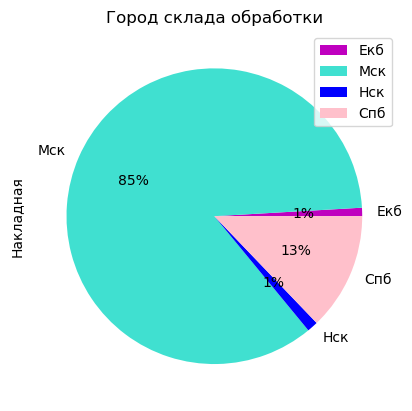

In [59]:
df_all.groupby(['Склад']).count().plot(kind='pie', y='Накладная',autopct='%1.0f%%',
       colors = ['m', 'turquoise', 'b','pink'],title='Город склада обработки')
plt.show()

- **Видим, что большая часть (85%) опасного груза принято в Москве, около 13% в Санкт-Петербурге. В Новосибирске и Екатеринбурге принято около 1% от общего числа.**

**Рассмотрим отношение подразделений, которые относятся к филиалу и к пунктам выдачи. Также рассмотрим соотношение клиентов с договором и без.**

In [60]:
table1=df_all['Филиал'].value_counts()
print(table1)
table2=df_all['Номер договора'].value_counts()
print(table2)

Филиал
ПВЗ       4839
Филиал    1259
Name: count, dtype: int64
Номер договора
Есть договор    4086
Нет договора    2012
Name: count, dtype: int64


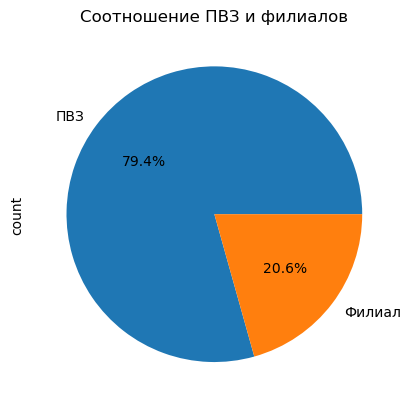

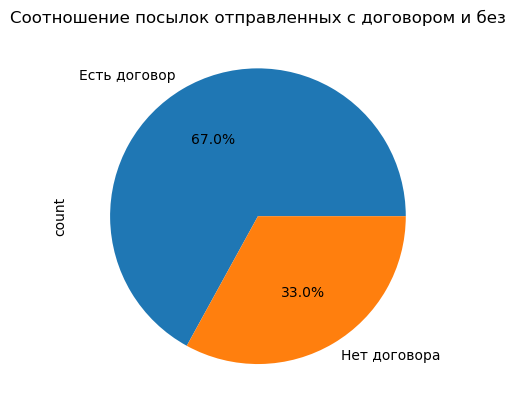

In [61]:
table1.plot(kind='pie',autopct='%1.1f%%',title = 'Соотношение ПВЗ и филиалов')
plt.show()
table2.plot(kind='pie',autopct='%1.1f%%',title = 'Соотношение посылок отправленных с договором и без')
plt.show()

- **Видим, что большая часть опасного груза была принята на ПВЗ**
- **У 67% посылок были отправлены клиентами, у которые есть договор**

**Составим сводную по рассмотренным данным**

In [62]:
df_all.pivot_table(index=['Склад', 'Филиал'], columns='Номер договора', values='Накладная', aggfunc='count')

Номер договора  Есть договор  Нет договора
Склад Филиал                              
Екб   ПВЗ               32.0          18.0
      Филиал             6.0           NaN
Мск   ПВЗ             2347.0        1709.0
      Филиал          1088.0          42.0
Нск   ПВЗ               42.0          30.0
      Филиал             NaN           1.0
Спб   ПВЗ              456.0         205.0
      Филиал           115.0           7.0

## Рассмотрим самых популярных нарушителей

### Клиенты, которые отправили больше всего посылок с ОГ:

In [63]:
table_client=df_all['Клиент'].value_counts()
table_client=table_client.reset_index()
table_client.rename(columns={'count':'Количество отправленных посылок с ОГ'}, inplace=True)

In [64]:
table_client.head(10)

,Клиент,Количество отправленных посылок с ОГ
0,Клиент 869,267
1,Клиент 326,221
2,Клиент 350,103
3,Клиент 817,98
4,Клиент 194,91
5,Клиент 3691,83
6,Клиент 1901,80
7,Клиент 755,59
8,Клиент 741,42
9,Клиент 678,34


### Подразделения, которые приняли больше всего посылок с ОГ:

In [65]:
table=df_all['Подразделение'].value_counts().head(10)
table=table.reset_index()
table.rename(columns={'count':'Количество отправленных посылок с ОГ'})

,Подразделение,Количество отправленных посылок с ОГ
0,Подразделение 774,675
1,Подразделение 773,338
2,Подразделение 772,185
3,Подразделение 1533,98
4,Подразделение 1868,82
5,Подразделение 1534,51
6,Подразделение 985,48
7,Подразделение 940,39
8,Подразделение 527,33
9,Подразделение 1037,32


## Проанализируем вложения посылок

**Рассмотрим опасные грузы, которые встречаются чаще всего**

In [66]:
inside=df_all['Описание вложения'].value_counts()
inside=inside.reset_index()
inside.head(20)

,Описание вложения,count
0,химическое вещество,1328
1,духи,1191
2,акб,751
3,косметика 9 класс,579
4,неизвестное вещество,529
5,аэрозоль,440
6,амортизатор,263
7,ароматизатор,253
8,автохимия,104
9,подушка безопасности,64


In [67]:
for i in range(len(inside)):
    if  inside['count'][i] <50:
        inside['Описание вложения'][i]='Другое'   

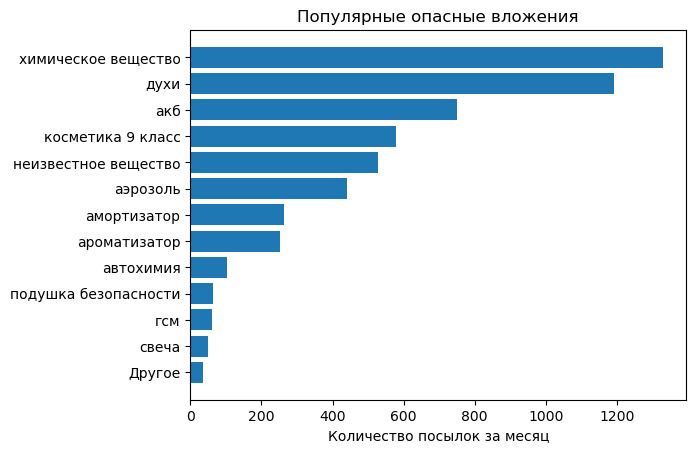

In [68]:
inside=inside.sort_values('count')
plt.barh(inside['Описание вложения'], inside['count'], label='Основные типы ОГ') #Параметр label позволяет задать название величины для легенды
plt.xlabel('Количество посылок за месяц')
plt.title('Популярные опасные вложения')
plt.show()   

**Изучаем причину задержки**

In [69]:
reason=df_all['Причина задержки'].value_counts()
reason=reason.reset_index()
reason

,Причина задержки,count
0,груз отстранен из-за отсутствия надбавки за оп...,2478
1,груз отстранен из-за ошибки в выборе транспорт...,1917
2,груз отстранен из-за отсутствия документов,1608
3,запрещенный к перевозке груз,76
4,прочее,19


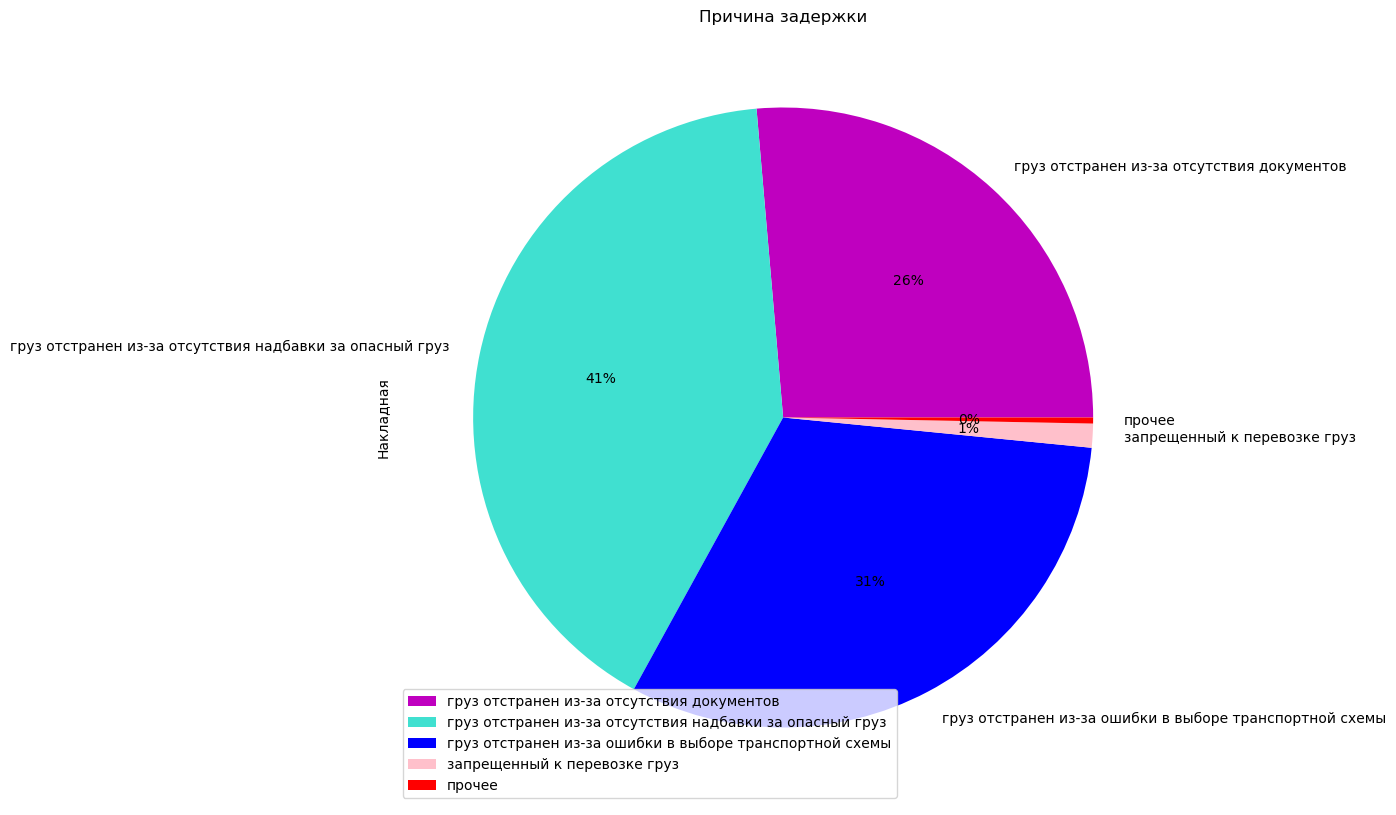

In [70]:
df_all.groupby(['Причина задержки']).count().plot(kind='pie', y='Накладная',autopct='%1.0f%%',
       colors = ['m', 'turquoise', 'b','pink','r'],title='Причина задержки',figsize=(10, 15))
plt.legend(loc='lower left')
plt.show()

**Видим, что 41 % посылок были задержаны из-за отсуствия надбавки за опасный груз. 26% из-за отсуствия документов, 31% из-за ошибки в выборе транспортной схемы, около 1 % это запрещенный груз и прочее.**

## Сохраняем готовый отчёт

In [71]:
df_all.to_excel (r'C:/Users/Natalya/Desktop/Отчеты по ОГ/Готовый отчет.xlsx', index= False )